# Support Vector Machine

In [13]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import accuracy_score
from qiskit.quantum_info import DensityMatrix
from qiskit.quantum_info import partial_trace
from sklearn.model_selection import GridSearchCV 
import matplotlib.pyplot as plt

# Dataset loading
dataset = np.load('dataset4f1.npy')
labels = np.load('labels4f1.npy')

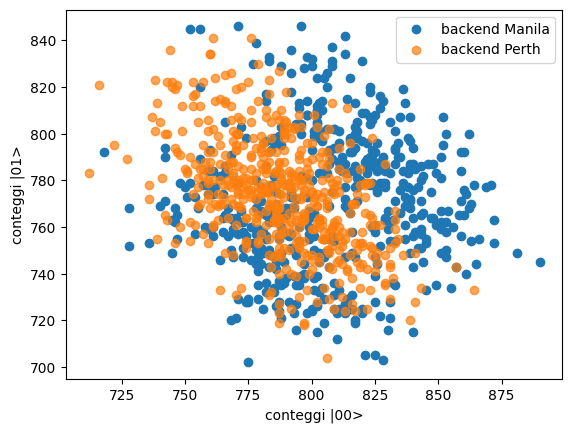

In [15]:
plt.scatter(x=dataset[labels==0,0], y=dataset[labels==0,1], alpha=(1), label='backend Manila')
plt.scatter(x=dataset[labels==1,0], y=dataset[labels==1,1], alpha=(0.7), label='backend Perth')
plt.legend()
plt.xlabel('conteggi |00>')
plt.ylabel('conteggi |01>')
plt.savefig('plt 1000 shots 0-1')

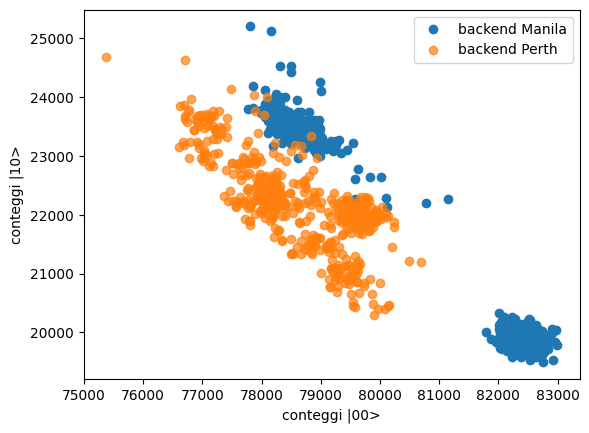

In [8]:
plt.scatter(x=dataset[labels==0,0], y=dataset[labels==0,2], alpha=(1),label='backend Manila')
plt.scatter(x=dataset[labels==1,0], y=dataset[labels==1,2], alpha=(0.7), label='backend Perth')
plt.legend()
plt.xlabel('conteggi |00>')
plt.ylabel('conteggi |10>')
plt.savefig('plt 0-2')

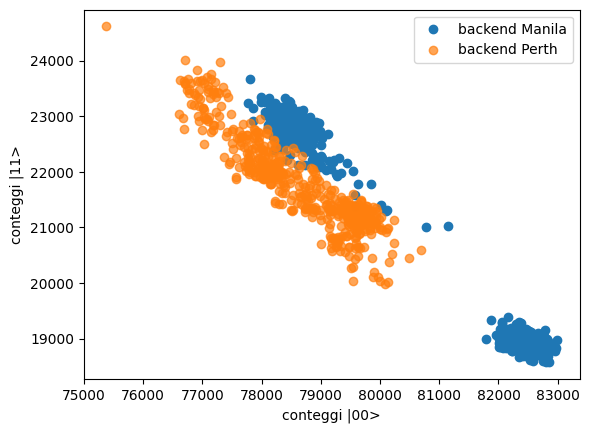

In [9]:
plt.scatter(x=dataset[labels==0,0], y=dataset[labels==0,3], alpha=(1),label='backend Manila' )
plt.scatter(x=dataset[labels==1,0], y=dataset[labels==1,3], alpha=(0.7), label='backend Perth')
plt.legend()
plt.xlabel('conteggi |00>')
plt.ylabel('conteggi |11>')
plt.savefig('plt 0-3')

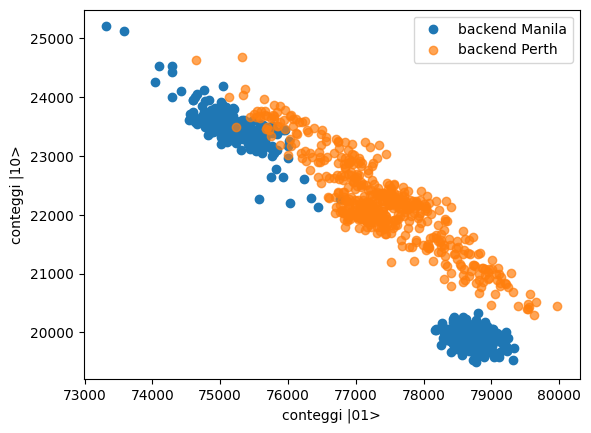

In [10]:
plt.scatter(x=dataset[labels==0,1], y=dataset[labels==0,2], alpha=(1),label='backend Manila' )
plt.scatter(x=dataset[labels==1,1], y=dataset[labels==1,2], alpha=(0.7), label='backend Perth')
plt.legend()
plt.xlabel('conteggi |01>')
plt.ylabel('conteggi |10>')
plt.savefig('plt 1-2')

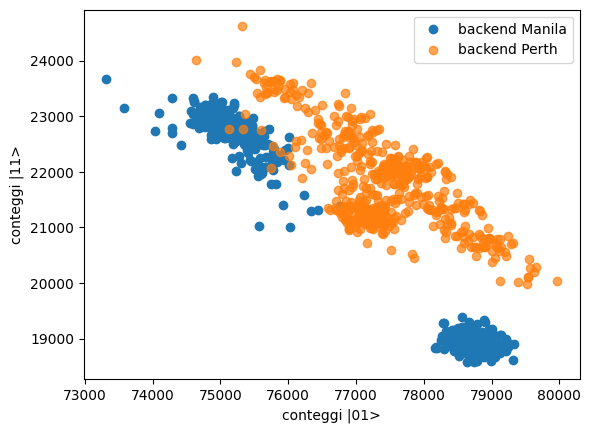

In [11]:
plt.scatter(x=dataset[labels==0,1], y=dataset[labels==0,3], alpha=(1),label='backend Manila' )
plt.scatter(x=dataset[labels==1,1], y=dataset[labels==1,3], alpha=(0.7), label='backend Perth')
plt.legend()
plt.xlabel('conteggi |01>')
plt.ylabel('conteggi |11>')
plt.savefig('plt 1-3')

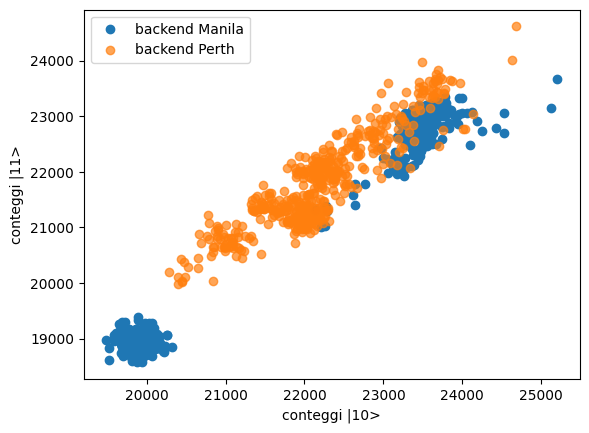

In [12]:
plt.scatter(x=dataset[labels==0,2], y=dataset[labels==0,3], alpha=(1),label='backend Manila' )
plt.scatter(x=dataset[labels==1,2], y=dataset[labels==1,3], alpha=(0.7), label='backend Perth')
plt.legend()
plt.xlabel('conteggi |10>')
plt.ylabel('conteggi |11>')
plt.savefig('plt 2-3')

In [82]:
dataset.shape

(1000, 2)

In [3]:
labels.shape

(50,)

In [4]:
print(dataset[34,3])

1035.0


In [5]:
# Dataset rescaling and training/validation split

scaler = MinMaxScaler().fit(dataset) #normalizzazione
dataset = scaler.transform(dataset)
training_set, validation_set, training_label, validation_label = train_test_split(dataset, labels, train_size = 0.7)

In [6]:
training_set.shape

(35, 4)

In [7]:
print(dataset[34,3])

0.4877192982456142


In [70]:
# SVM definition and training
svm_classifier = SVC(kernel='rbf', C=10, gamma=0.1)
svm_classifier.fit(training_set, training_label)

SVC(C=10, gamma=0.1)

In [6]:
# SVM definition and training
svm_classifier = SVC(kernel='linear', C=10)
svm_classifier.fit(training_set, training_label)

SVC(C=10, kernel='linear')

In [68]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000],
              "gamma": [0.01, 0.1, 1]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring="accuracy", verbose = 0)
grid_search.fit(training_set, training_label)
best_clf = grid_search.best_estimator_

In [7]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring="accuracy", verbose = 0)
grid_search.fit(training_set, training_label)
best_clf = grid_search.best_estimator_

In [69]:
print(best_clf)

SVC(C=10, gamma=1)


In [71]:
y_pred = svm_classifier.predict(validation_set)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(validation_label, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 73.33%


# Quantum Support Vector Machine

In [74]:
from qiskit.circuit import ParameterVector
from qiskit_machine_learning.kernels import FidelityStatevectorKernel
from qiskit.circuit import QuantumCircuit
from qiskit import Aer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import ZFeatureMap
#from qiskit.circuit.library import PauliFeatureMap

nb_features = dataset.shape[1]
x = ParameterVector("x", length=nb_features)
backend = Aer.get_backend("statevector_simulator")

possibili feature maps da usare:

In [7]:
fmap= ZFeatureMap(4, reps=1)

In [12]:
fmap= ZZFeatureMap(2, reps=1) 

In [14]:
fmap = QuantumCircuit(4) #fmap senza entanglement 
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)
fmap.rx(2*np.pi*x[1], 1)
fmap.rx(2*np.pi*x[0], 0)
fmap.rx(2*np.pi*x[2], 2)
fmap.rx(2*np.pi*x[3], 3)
fmap.ry(np.pi/3, 1)
fmap.ry(np.pi/3, 0)
fmap.ry(np.pi/3, 2)
fmap.ry(np.pi/3, 3)
fmap.rx(7*np.pi/2, 0)
fmap.rx(7*np.pi/2, 1)
fmap.rx(7*np.pi/2, 2)
fmap.rx(7*np.pi/2, 3)
fmap.ry(2*np.pi*x[0]*7, 0)
fmap.ry(2*np.pi*x[1]*7, 1)
fmap.ry(2*np.pi*x[2]*7, 2)
fmap.ry(2*np.pi*x[3]*7, 3)
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)

In [75]:
#FEATURE MAP DA 4 QUBIT
fmap = QuantumCircuit(4) #fmap con entanglement
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.cx(0,1) #il secondo è il qubit bersaglio
fmap.cx(0,2)
fmap.cx(0,3)
fmap.crz(np.pi/8, 0,1)
fmap.crz(np.pi/9, 2,3)
fmap.cp(np.pi/3,2, 3)
fmap.cx(1,3)
fmap.cx(1,0)
fmap.cx(1,2)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)

In [47]:
#FEATURE MAP DA 6 QUBIT
fmap = QuantumCircuit(6) #fmap con entanglement
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.h(4)
fmap.h(5)
fmap.cx(0,1) #il secondo è il qubit bersaglio
fmap.cx(0,2)
fmap.cx(0,3)
fmap.cx(0,4)
fmap.cx(0,5)
fmap.crz(np.pi/8, 0,1)
fmap.crz(np.pi/9, 2,3)
fmap.cp(np.pi/3, 2,3)
fmap.crz(np.pi/9, 4,5)
fmap.cp(np.pi/3, 4,5)
fmap.cx(1,3)
fmap.cx(1,0)
fmap.cx(1,2)
fmap.cx(1,4)
fmap.cx(1,5)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)
fmap.rz(2*np.pi*x[1], 4)
fmap.rz(2*np.pi*x[1], 5)

In [62]:
#FEATURE MAP DA 8 QUBIT
fmap = QuantumCircuit(8) #fmap con entanglement
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.h(4)
fmap.h(5)
fmap.h(6)
fmap.h(7)
fmap.cx(0,1) #il secondo è il qubit bersaglio
fmap.cx(0,2)
fmap.cx(0,3)
fmap.cx(0,4)
fmap.cx(0,5)
fmap.cx(0,6)
fmap.cx(0,7)
fmap.crz(np.pi/8, 0,1)
fmap.crz(np.pi/9, 2,3)
fmap.cp(np.pi/3, 2,3)
fmap.crz(np.pi/9, 4,5)
fmap.cp(np.pi/3, 4,5)
fmap.crz(np.pi/9, 6,7)
fmap.cp(np.pi/3, 6,7)
fmap.cx(1,3)
fmap.cx(1,0)
fmap.cx(1,2)
fmap.cx(1,4)
fmap.cx(1,5)
fmap.cx(1,6)
fmap.cx(1,7)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)
fmap.rz(2*np.pi*x[1], 4)
fmap.rz(2*np.pi*x[1], 5)
fmap.rz(2*np.pi*x[2], 6)
fmap.rz(2*np.pi*x[3], 7)

In [21]:
#FEATURE MAP DA 10 QUBIT
fmap = QuantumCircuit(10) #fmap con entanglement
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.h(4)
fmap.h(5)
fmap.h(6)
fmap.h(7)
fmap.h(8)
fmap.h(9)
fmap.cx(0,1) #il secondo è il qubit bersaglio
fmap.cx(0,2)
fmap.cx(0,3)
fmap.cx(0,4)
fmap.cx(0,5)
fmap.cx(0,6)
fmap.cx(0,7)
fmap.cx(0,8)
fmap.cx(0,9)
fmap.crz(np.pi/8, 0,1)
fmap.crz(np.pi/9, 2,3)
fmap.cp(np.pi/3, 2,3)
fmap.crz(np.pi/9, 4,5)
fmap.cp(np.pi/3, 4,5)
fmap.crz(np.pi/9, 6,7)
fmap.cp(np.pi/3, 6,7)
fmap.crz(np.pi/9, 8,9)
fmap.cp(np.pi/3, 8,9)
fmap.cx(1,3)
fmap.cx(1,0)
fmap.cx(1,2)
fmap.cx(1,4)
fmap.cx(1,5)
fmap.cx(1,6)
fmap.cx(1,7)
fmap.cx(1,8)
fmap.cx(1,9)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)
fmap.rz(2*np.pi*x[1], 4)
fmap.rz(2*np.pi*x[1], 5)
fmap.rz(2*np.pi*x[2], 6)
fmap.rz(2*np.pi*x[3], 7)
fmap.rz(2*np.pi*x[0], 8)
fmap.rz(2*np.pi*x[2], 9)

In [8]:
#FEATURE MAP DA 12 QUBIT
fmap = QuantumCircuit(12) #fmap con entanglement
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.h(4)
fmap.h(5)
fmap.h(6)
fmap.h(7)
fmap.h(8)
fmap.h(9)
fmap.h(10)
fmap.h(11)
fmap.cx(0,1) #il secondo è il qubit bersaglio
fmap.cx(0,2)
fmap.cx(0,3)
fmap.cx(0,4)
fmap.cx(0,5)
fmap.cx(0,6)
fmap.cx(0,7)
fmap.cx(0,8)
fmap.cx(0,9)
fmap.cx(0,10)
fmap.cx(0,11)
fmap.crz(np.pi/8, 0,1)
fmap.crz(np.pi/9, 2,3)
fmap.cp(np.pi/3, 2,3)
fmap.crz(np.pi/9, 4,5)
fmap.cp(np.pi/3, 4,5)
fmap.crz(np.pi/9, 6,7)
fmap.cp(np.pi/3, 6,7)
fmap.crz(np.pi/9, 8,9)
fmap.cp(np.pi/3, 8,9)
fmap.crz(np.pi/9, 10,11)
fmap.cp(np.pi/3, 10,11)
fmap.cx(1,3)
fmap.cx(1,0)
fmap.cx(1,2)
fmap.cx(1,4)
fmap.cx(1,5)
fmap.cx(1,6)
fmap.cx(1,7)
fmap.cx(1,8)
fmap.cx(1,9)
fmap.cx(1,10)
fmap.cx(1,11)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)
fmap.rz(2*np.pi*x[1], 4)
fmap.rz(2*np.pi*x[1], 5)
fmap.rz(2*np.pi*x[2], 6)
fmap.rz(2*np.pi*x[3], 7)
fmap.rz(2*np.pi*x[0], 8)
fmap.rz(2*np.pi*x[2], 9)
fmap.rz(2*np.pi*x[1], 10)
fmap.rz(2*np.pi*x[3], 11)

In [ ]:
#FEATURE MAP DA 14 QUBIT
fmap = QuantumCircuit(14) #fmap con entanglement
fmap.h(0)
fmap.h(1)
fmap.h(2)
fmap.h(3)
fmap.h(4)
fmap.h(5)
fmap.h(6)
fmap.h(7)
fmap.h(8)
fmap.h(9)
fmap.h(10)
fmap.h(11)
fmap.h(12)
fmap.h(13)
fmap.cx(0,1) #il secondo è il qubit bersaglio
fmap.cx(0,2)
fmap.cx(0,3)
fmap.cx(0,4)
fmap.cx(0,5)
fmap.cx(0,6)
fmap.cx(0,7)
fmap.cx(0,8)
fmap.cx(0,9)
fmap.cx(0,10)
fmap.cx(0,11)
fmap.cx(0,12)
fmap.cx(0,13)
fmap.crz(np.pi/8, 0,1)
fmap.crz(np.pi/9, 2,3)
fmap.cp(np.pi/3, 2,3)
fmap.crz(np.pi/9, 4,5)
fmap.cp(np.pi/3, 4,5)
fmap.crz(np.pi/9, 6,7)
fmap.cp(np.pi/3, 6,7)
fmap.crz(np.pi/9, 8,9)
fmap.cp(np.pi/3, 8,9)
fmap.crz(np.pi/9, 10,11)
fmap.cp(np.pi/3, 10,11)
fmap.crz(np.pi/9, 12,13)
fmap.cp(np.pi/3, 12,13)
fmap.cx(1,3)
fmap.cx(1,0)
fmap.cx(1,2)
fmap.cx(1,4)
fmap.cx(1,5)
fmap.cx(1,6)
fmap.cx(1,7)
fmap.cx(1,8)
fmap.cx(1,9)
fmap.cx(1,10)
fmap.cx(1,11)
fmap.cx(1,12)
fmap.cx(1,13)
fmap.rz(2*np.pi*x[0], 0) 
fmap.rz(2*np.pi*x[1], 1)
fmap.rz(2*np.pi*x[2], 2)
fmap.rz(2*np.pi*x[3], 3)
fmap.rz(2*np.pi*x[1], 4)
fmap.rz(2*np.pi*x[1], 5)
fmap.rz(2*np.pi*x[2], 6)
fmap.rz(2*np.pi*x[3], 7)
fmap.rz(2*np.pi*x[0], 8)
fmap.rz(2*np.pi*x[2], 9)
fmap.rz(2*np.pi*x[1], 10)
fmap.rz(2*np.pi*x[3], 11)
fmap.rz(2*np.pi*x[2], 12)
fmap.rz(2*np.pi*x[0], 13)

In [17]:
print(fmap.decompose())

global phase: -π*x[0] - π*x[1] - π*x[2] - π*x[3]
     ┌─────────┐                                                    »
q_0: ┤ U2(0,π) ├──■────────────────■────■───────■───────────────────»
     ├─────────┤┌─┴─┐┌──────────┐  │    │     ┌─┴─┐    ┌───────────┐»
q_1: ┤ U2(0,π) ├┤ X ├┤ Rz(π/16) ├──┼────┼─────┤ X ├────┤ Rz(-π/16) ├»
     ├─────────┤└───┘└──────────┘┌─┴─┐  │     └───┘    └───────────┘»
q_2: ┤ U2(0,π) ├─────────────────┤ X ├──┼────────────────────■──────»
     ├─────────┤                 └───┘┌─┴─┐┌──────────┐    ┌─┴─┐    »
q_3: ┤ U2(0,π) ├──────────────────────┤ X ├┤ Rz(π/18) ├────┤ X ├────»
     └─────────┘                      └───┘└──────────┘    └───┘    »
«                                                                     »
«q_0: ──────■─────────────────────────────────────────────────────────»
«         ┌─┴─┐                                                       »
«q_1: ────┤ X ├────────────────────────────────────────────────────■──»
«         └───┘         ┌────────

In [76]:
qker = FidelityStatevectorKernel(feature_map=fmap) #creo quantum kernel associato alla fmap feature map
qker_matrix = qker.evaluate(x_vec=training_set)

qsvm_classifier = SVC(kernel="precomputed", C=10)

In [ ]:
qker = FidelityStatevectorKernel(feature_map=fmap)
qker_matrix = qker.evaluate(x_vec=training_set)
qsvm_classifier = SVC(kernel="precomputed", C=1)
qsvm_classifier.fit(qker_matrix, training_label)

In [64]:
qker_matrix_training= qker.evaluate(x_vec = training_set)
qsvm_classifier.fit(qker_matrix_training, training_label)

SVC(C=10, kernel='precomputed')

In [24]:
param_grid = {"C": [0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid_search = GridSearchCV(qsvm_classifier, param_grid, cv=5, scoring="accuracy", verbose = 0)
grid_search.fit(qker_matrix_training, training_label)
best_clf = grid_search.best_estimator_

In [25]:
print(best_clf)

SVC(C=10, kernel='precomputed')


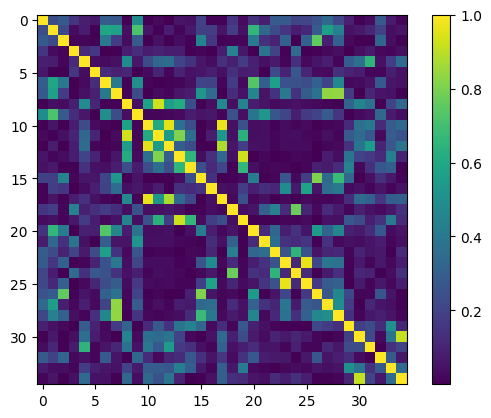

In [29]:
plt.imshow(qker_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()

In [16]:
np.save('matrice12Q_nuovo2', qker_matrix)

In [ ]:
qker_matrix = np.load('')

In [120]:
print(qker_matrix[0,122])

2.047081458580064e-09


In [77]:
qker_matrix_val= qker.evaluate(x_vec=validation_set, y_vec= training_set)

In [ ]:
qker_matrix_test= qker.evaluate(x_vec=validation_set, y_vec= training_set)
qsvm_classifier.score(qker_matrix_test, test_label) #accuratezza

In [78]:
qker_matrix_val= qker.evaluate(x_vec=validation_set)

accuratezza sulla validation:

In [ ]:
qsvm_classifier.score(qker_matrix_val, validation_label) #accuratezza

In [79]:
accuratezza = cross_val_score(qsvm_classifier, qker_matrix_val, validation_label, cv=5, scoring='accuracy')
media_ac = accuratezza.mean()
print(media_ac)

0.9333333333333332


accuratezza sul training:

In [30]:
qsvm_classifier.score(qker_matrix_training, training_label) #accuratezza

0.9428571428571428

In [ ]:
accuratezza = cross_val_score(qsvm_classifier, qker_matrix, training_label, cv=5, scoring='accuracy')
media_ac = accuratezza.mean()
print(media_ac)

In [150]:
varianza = np.var(qker_matrix)
print(varianza)

0.036444982220391185


In [6]:
qker_matrix = np.load('matrice12Q_nuovo2.npy')

In [7]:
riga = qker_matrix[0]

In [8]:
varianza4Q = np.var(riga)
print(varianza4Q)

0.054791632485595376


# projected quantum kernel

In [67]:
def projected_quantum_kernel(fmap: QuantumCircuit, dataset: np.ndarray, gamma: float)-> np.ndarray:
    if not fmap.parameters:
        kernel_matrix = np.ones((dataset.shape[0], dataset.shape[0]))
        return  kernel_matrix
    kernel_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
        for j in range(i):
            statevector_i_dm = DensityMatrix(fmap.assign_parameters(dataset[i]))
            statevector_j_dm = DensityMatrix(fmap.assign_parameters(dataset[j]))
            exp_term = 0
            for q in range(fmap.num_qubits):
                summed_qubits = [k for k in range(fmap.num_qubits) if k != q]
                exp_term = exp_term + np.linalg.norm(partial_trace(statevector_i_dm, summed_qubits) 
                                                     - partial_trace(statevector_j_dm, summed_qubits))**2
            kernel_matrix[i, j] = np.exp(-gamma * exp_term)
    kernel_matrix =  kernel_matrix +  kernel_matrix.T + np.identity(dataset.shape[0])
    return  kernel_matrix

funzione ottimizzata con eliminazione di un ciclo for

In [8]:
def projected_quantum_kernel(fmap: QuantumCircuit, dataset: np.ndarray, gamma: float)-> np.ndarray:
    if not fmap.parameters:
        kernel_matrix = np.ones((dataset.shape[0], dataset.shape[0]))
        return  kernel_matrix
    kernel_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
    for i in range(dataset.shape[0]):
            statevector_i_dm = DensityMatrix(fmap.assign_parameters(dataset[i]))
            statevector_j_dm = DensityMatrix(fmap.assign_parameters(dataset[0]))
            exp_term = 0
            for q in range(fmap.num_qubits):
                summed_qubits = [k for k in range(fmap.num_qubits) if k != q]
                exp_term = exp_term + np.linalg.norm(partial_trace(statevector_i_dm, summed_qubits) - partial_trace(statevector_j_dm, summed_qubits))**2
            kernel_matrix[i, 0] = np.exp(-gamma * exp_term)
    kernel_matrix =  kernel_matrix +  kernel_matrix.T + np.identity(dataset.shape[0])
    return  kernel_matrix

In [23]:
def projected_quantum_kernel(fmap: QuantumCircuit, dataset: np.ndarray, gamma: float)-> np.ndarray:
    if not fmap.parameters:
        kernel_matrix = np.ones((dataset.shape[0], dataset.shape[0]))
        return  kernel_matrix
    kernel_matrix = np.zeros((dataset.shape[0], dataset.shape[0]))
    statevector_j_dm = DensityMatrix(fmap.assign_parameters(dataset[0]))
    for i in range(dataset.shape[0]):
            statevector_i_dm = DensityMatrix(fmap.assign_parameters(dataset[i]))
            exp_term = 0
            for q in range(fmap.num_qubits):
                summed_qubits = [k for k in range(fmap.num_qubits) if k != q]
                exp_term = exp_term + np.linalg.norm(partial_trace(statevector_i_dm, summed_qubits) - partial_trace(statevector_j_dm, summed_qubits))**2
            kernel_matrix[i, 0] = np.exp(-gamma * exp_term)
    kernel_matrix =  kernel_matrix +  kernel_matrix.T + np.identity(dataset.shape[0])
    return  kernel_matrix

In [68]:
qker_matrix = projected_quantum_kernel(fmap, training_set, 1)

qsvm_classifier = SVC(kernel="precomputed")

In [69]:
qsvm_classifier.fit(qker_matrix, training_label)

SVC(kernel='precomputed')

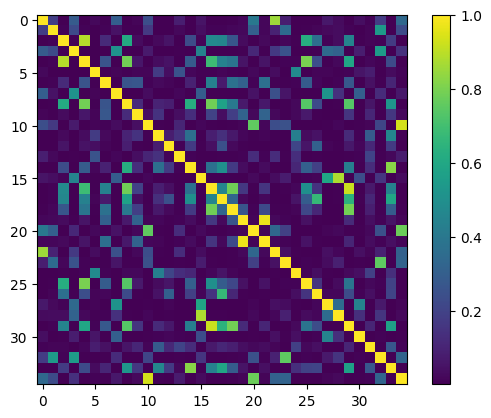

In [12]:
plt.imshow(qker_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()

In [18]:
np.save('matriceprojected4Q_nuovo2', qker_matrix)

In [70]:
qker_matrix_val= projected_quantum_kernel(fmap, validation_set, 1)

accurtezza sul training

In [56]:
accuratezza = cross_val_score(qsvm_classifier, qker_matrix, training_label, cv=5, scoring='accuracy')

In [57]:
media_ac = accuratezza.mean()

In [58]:
print(media_ac)

0.7714285714285715


accuratezza sulla validation

In [71]:
accuratezza = cross_val_score(qsvm_classifier, qker_matrix_val, validation_label, cv=5, scoring='accuracy')

In [72]:
media_ac = accuratezza.mean()

In [73]:
print(media_ac)

0.9333333333333332


In [38]:
varianza4Q = np.var(qker_matrix)
print(varianza4Q)

0.07207788207105946


In [39]:
print(qker_matrix[0,122])

IndexError: index 122 is out of bounds for axis 1 with size 35

In [ ]:
qker_matrix = np.load('matriceprojected10Q1_50s.npy')

In [35]:
riga = qker_matrix[0]

In [20]:
varianza4Q = np.var(riga)
print(varianza4Q)

0.0637328567485119
